<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

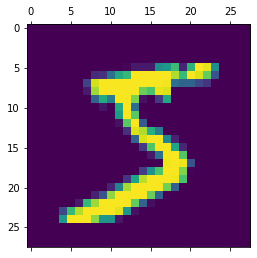

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 548us/step - loss: 0.7236 - accuracy: 0.8099
Epoch 2/5
1875/1875 [==============================] - 1s 580us/step - loss: 0.3181 - accuracy: 0.9114
Epoch 3/5
1875/1875 [==============================] - 1s 575us/step - loss: 0.2875 - accuracy: 0.9192
Epoch 4/5
1875/1875 [==============================] - 1s 615us/step - loss: 0.2771 - accuracy: 0.9225
Epoch 5/5
1875/1875 [==============================] - 1s 607us/step - loss: 0.2675 - accuracy: 0.9255


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 412us/step - loss: 0.2667 - accuracy: 0.9262


[0.2666738033294678, 0.9261999726295471]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.8062353e-02, 4.6426939e-07, 8.6104751e-02, 9.6969211e-01,
       2.4074018e-03, 1.3748854e-01, 1.6187435e-06, 9.9982238e-01,
       8.6272269e-02, 6.4533293e-01], dtype=float32)

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm  = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    4,    2,    0,    6,    6,    2,    1,    1],
       [   0, 1112,    4,    2,    0,    1,    4,    2,   10,    0],
       [   3,    8,  944,   12,    8,    4,   11,    9,   29,    4],
       [   2,    0,   23,  925,    0,   25,    2,   10,   14,    9],
       [   2,    1,    5,    1,  920,    0,    8,    4,   10,   31],
       [   8,    2,    4,   34,    9,  783,   14,    5,   27,    6],
       [   9,    3,   10,    1,    8,   15,  907,    2,    3,    0],
       [   1,    5,   25,    6,    7,    0,    0,  951,    4,   29],
       [   5,    9,    8,   26,    9,   33,    8,   12,  858,    6],
       [   9,    7,    2,   11,   36,    7,    0,   26,    7,  904]])>

Text(69.0, 0.5, 'Truth')

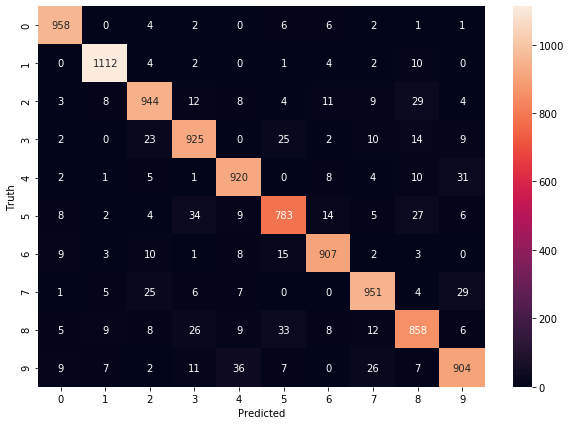

In [20]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),    
    keras.layers.Dense(10, activation='sigmoid')   
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 708us/step - loss: 0.4493 - accuracy: 0.8743
Epoch 2/5
1875/1875 [==============================] - 1s 666us/step - loss: 0.1323 - accuracy: 0.9609
Epoch 3/5
1875/1875 [==============================] - 1s 696us/step - loss: 0.0904 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.0656 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.0502 - accuracy: 0.9849


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 518us/step - loss: 0.0885 - accuracy: 0.9741


[0.08853214979171753, 0.9740999937057495]

Text(69.0, 0.5, 'Truth')

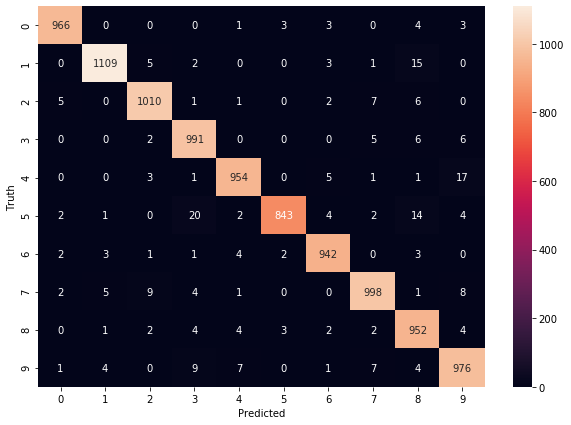

In [23]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(100, activation='relu'),    
    keras.layers.Dense(10, activation='sigmoid')   
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 784us/step - loss: 1.0843 - accuracy: 0.7194
Epoch 2/5
1875/1875 [==============================] - 1s 682us/step - loss: 0.3589 - accuracy: 0.9002
Epoch 3/5
1875/1875 [==============================] - 1s 693us/step - loss: 0.3039 - accuracy: 0.9153
Epoch 4/5
1875/1875 [==============================] - 1s 738us/step - loss: 0.2715 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 1s 642us/step - loss: 0.2461 - accuracy: 0.9310
